## Instagram posts data analysis

### Objectives
This project is to analyze Instagram posts data to understand the factors that increase engagement using indications like Impressions, Likes, Comments, Shares, Saves, Profile Visits, and Follows.It also examines the most used Captions and Hashtags.
This analysis can help in improving contents and increase reach and engagement.



### Instagram dataset field description

Below is a description of the column fields in the dataset :

## core fields:
  
  **Impressions** :
      The Total number of times the post was viewed.

  **From Home** :
      The number of impressions the post received from feed.

  **From Hashtags** :
      The number of impressions generated via hashtags used.

  **From Explore** :
      The number of impressions coming from the Explore page.

  **From Other** :
    The number of impressions coming from any other source.
  
  **Saves** :
    The number of times users saved the post.
 
  **Comments** :
    The total number of comments on the post written by users.

  **shares** :
    The number of times the users shared the post with others.

  **Likes** :
    The total number of likes received on the post from users.

  **Profile Visit** :
    The number of users visited the profile after seeing the post.
  
  **Follows** :
    The number of new followers gained after seeing the post.

  **Caption** :
    The text written to be puplished with the post to explain its aim.

  **Hashtag** :
    Some keywords used to increase reach and popularity.

## Questions to be answered depending on analysis:

 1. Which hashtag is repeated the most?
 2. Is there a relation between number of profile visits and follows ?
 3. Does the shorter caption affect the engagement?
 4. Do posts with more likes receive more comments?
 5. Which source causes more views?
 6. Is there a relation between certain hashtags and saving the post?
 7. Are saves more representable than likes,comments and shares
 


### Data Wrangling
Assess the data by printing the first 4 rows.


In [1]:
#load the needed libraries
import pandas as pd
import corrections
import matplotlib as plt
import seaborn as sns

In [2]:
#load the dataset into dataframe
df= pd.read_csv("E:/Instagram data.csv",encoding= "latin-1")

In [3]:
#display the first 4 raws
df.head(4)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...


In [4]:
#check for data size
df.shape

(119, 13)

- Dataset consists of (119) rows and (13) columns

In [5]:
#check for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


- There are non missing values
- we can drop the column "from other"
- we need to add some new columns
- all data types are correct

### Feature engineering
- add column to represent all engagements include saves,comments,shares,likes,proflle visits and follows
- add column to represent captionlength 
- hashtages column to be exploded

In [6]:
# copy the dataframe
df_copy = df.copy

In [7]:
# check for null values
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

np.int64(17)

- There are 17 duplicated rows

In [9]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
#check for dropping duplicates
df.duplicated().sum()

np.int64(0)

- There is no null values

In [11]:
#list data columns 
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [12]:
df.drop(columns='From Other' , inplace=True)

In [13]:
# add column to represent all engagements include saves,comments,shares,likes,proflle visits and follows
df['Engagements']= df['Saves'] + df['Comments'] + df['Shares'] + df['Likes'] + df['Profile Visits'] + df['Follows']
df['Engagements']

0       311
1       497
2       258
3       433
4       236
       ... 
114    1139
115     326
116     173
117    2083
118    1966
Name: Engagements, Length: 102, dtype: int64

In [14]:
# add column to represent caption list
df['Captionlength']=df['Caption'].apply(lambda x : len(str(x).split()))
df['Captionlength']

0      16
1      34
2      20
3      41
4      28
       ..
114    16
115    50
116    34
117    16
118    14
Name: Captionlength, Length: 102, dtype: int64

In [15]:
# add column to represent sources include 'From Home', 'From Hashtags', 'From Explore'
df['average_Sources']= df[['From Home','From Hashtags','From Explore']].mean(axis= 1)
df['average_Sources']

0       1411.000000
1       1913.000000
2       1091.000000
3       1417.666667
4        746.000000
           ...     
114     4526.000000
115     1852.333333
116     1346.000000
117    10792.000000
118    11364.333333
Name: average_Sources, Length: 102, dtype: float64

In [16]:
# check the columns after adding and dropping
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'Saves',
       'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption',
       'Hashtags', 'Engagements', 'Captionlength', 'average_Sources'],
      dtype='object')

- The  new  columns
   "Engagement" represent 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows'
   "Captionlength" represent the number of words in each caption to be used in analysis


In [17]:
# split hashtags with # into a list
df['Hashtags']= df['Hashtags'].str.split('#')

In [18]:
#check
df.head(1)

,Impressions,From Home,From Hashtags,From Explore,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagements,Captionlength,average_Sources
0,3920,2586,1028,619,98,9,5,162,35,2,Here are some of the most important data visua...,"[, finance , money , business , investing , in...",311,16,1411.0


- Split hashtags with # into a list

In [19]:
hashtags_df = df.explode('Hashtags')
hashtags_df['Hashtags'].value_counts()
hashtags_df.head(1)

,Impressions,From Home,From Hashtags,From Explore,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagements,Captionlength,average_Sources
0,3920,2586,1028,619,98,9,5,162,35,2,Here are some of the most important data visua...,,311,16,1411.0


In [20]:
hashtags_df.Hashtags.unique()

array(['', 'finance\xa0', 'money\xa0', 'business\xa0', 'investing\xa0',
       'investment\xa0', 'trading\xa0', 'stockmarket\xa0', 'data\xa0',
       'datascience\xa0', 'dataanalysis\xa0', 'dataanalytics\xa0',
       'datascientist\xa0', 'machinelearning\xa0', 'python\xa0',
       'pythonprogramming\xa0', 'pythonprojects\xa0', 'pythoncode\xa0',
       'artificialintelligence\xa0', 'ai\xa0', 'dataanalyst\xa0',
       'amankharwal\xa0', 'thecleverprogrammer', 'healthcare\xa0',
       'health\xa0', 'covid\xa0', 'deeplearning\xa0',
       'machinelearningprojects\xa0', 'datascienceprojects\xa0',
       'thecleverprogrammer\xa0', 'machinelearningmodels',
       'pythonlearning\xa0', 'pythondeveloper\xa0', 'pythoncoding\xa0',
       'pythonprogrammer\xa0', 'pythonprojects', 'datavisualization\xa0',
       'bigdata\xa0', 'dataviz\xa0', 'analytics\xa0', 'technology\xa0',
       'programming\xa0', 'statistics\xa0', 'coding\xa0',
       'businessintelligence\xa0', 'datamining\xa0', 'tech\xa0',
 

In [21]:
hashtags_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 118
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Impressions      1994 non-null   int64  
 1   From Home        1994 non-null   int64  
 2   From Hashtags    1994 non-null   int64  
 3   From Explore     1994 non-null   int64  
 4   Saves            1994 non-null   int64  
 5   Comments         1994 non-null   int64  
 6   Shares           1994 non-null   int64  
 7   Likes            1994 non-null   int64  
 8   Profile Visits   1994 non-null   int64  
 9   Follows          1994 non-null   int64  
 10  Caption          1994 non-null   object 
 11  Hashtags         1994 non-null   object 
 12  Engagements      1994 non-null   int64  
 13  Captionlength    1994 non-null   int64  
 14  average_Sources  1994 non-null   float64
dtypes: float64(1), int64(12), object(2)
memory usage: 249.2+ KB


In [22]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,Saves,Comments,Shares,Likes,Profile Visits,Follows,Engagements,Captionlength,average_Sources
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5920.254902,2496.911765,1968.284314,1178.568627,156.549020,6.352941,9.303922,176.823529,54.666667,22.823529,426.519608,30.882353,1881.254902
std,5139.888111,1588.377397,1977.298128,2797.212621,157.770332,3.308097,10.150149,85.151747,93.169954,43.685966,336.862687,21.991580,1648.520958
min,1941.000000,1133.000000,116.000000,0.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000,128.000000,8.000000,638.000000
25%,3556.000000,1923.750000,753.000000,178.750000,70.500000,4.000000,3.000000,122.000000,16.000000,4.000000,237.250000,16.000000,1066.750000
50%,4343.500000,2216.000000,1326.000000,337.000000,111.000000,6.000000,6.500000,157.500000,24.000000,8.000000,322.500000,22.000000,1406.166667
75%,6296.250000,2605.250000,2415.750000,728.500000,173.500000,8.000000,13.000000,208.750000,45.750000,18.000000,457.000000,38.750000,2003.833333
max,36919.000000,13473.000000,11817.000000,17414.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000,2083.000000,134.000000,11364.333333


In [ ]:
df["Caption"].str.split()
caption_df = df.explode('Captions')
hashtags_df['Hashtags'].value_counts()
hashtags_df.head(1)

### Which hashtags cause icreasing in the number of impressions?

In [34]:
hashtags_df['Hashtags'].value_counts().head(10)

Hashtags
                           102
amankharwal                 93
python                      93
pythonprogramming           84
machinelearning             80
datascience                 79
ai                          77
artificialintelligence      75
data                        74
pythonprojects              74
Name: count, dtype: int64

 ### Is there a relation between number of profile visits and follows ?

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 

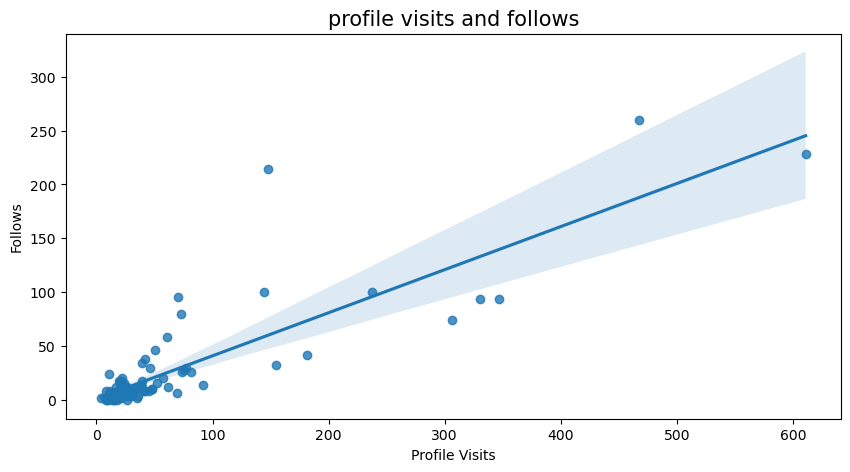

In [39]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Profile Visits' ,y= 'Follows' )
plt.title( 'profile visits and follows',fontsize=15)
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.show()


The relation between profile visits and follows is positive

### Does the shorter caption affect the engagement?

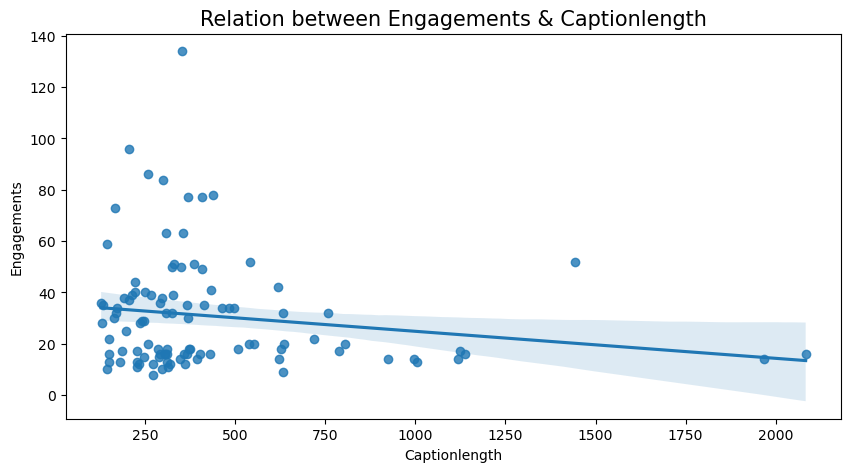

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Engagements', y='Captionlength' )
plt.title( "Relation between Engagements & Captionlength",fontsize=15)
plt.xlabel('Captionlength')
plt.ylabel('Engagements')
plt.show()

In [ ]:
there is an inverse relationship between engagements and caption length

### Do posts with more likes receive more comments?

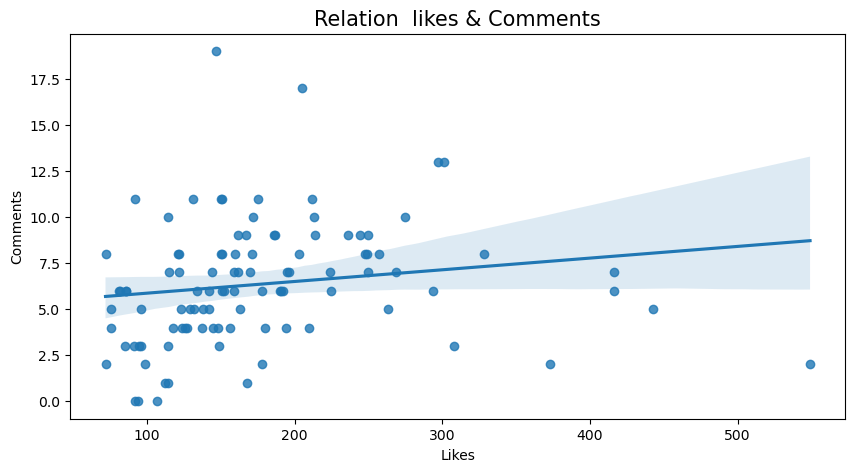

In [42]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Likes', y='Comments' )
plt.title( "Relation  likes & Comments",fontsize=15)
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

### Which source causes more views?

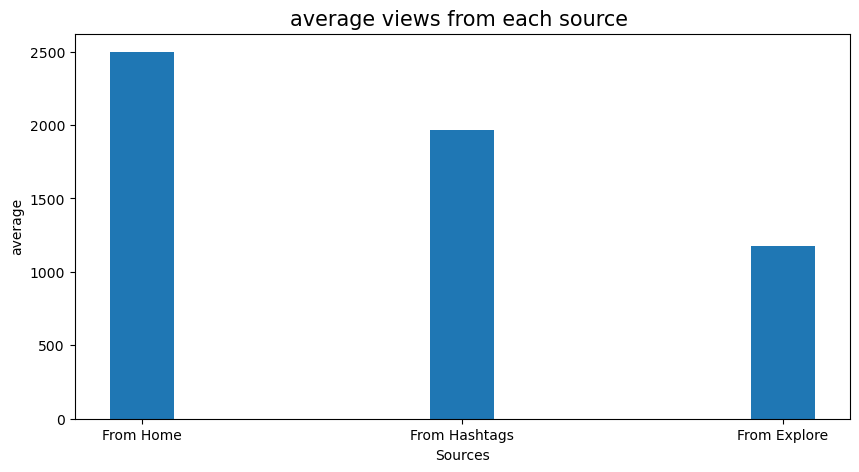

In [45]:
plt.figure(figsize=(10,5))
sources = ['From Home', 'From Hashtags','From Explore']
avr= [df['From Home'].mean(),df['From Hashtags'].mean(),df['From Explore'].mean()]
plt.bar(sources, avr,width=0.2)
plt.title('average views from each source ',fontsize = 15)
plt.xlabel("Sources")
plt.ylabel("average")
plt.show()




In [ ]:
the bargraph shows that “From Home” has the highest average, followed by “From Hashtag,” and then “From Explorer.

### Is there a relation between certain hashtags and Engagements?

In [82]:
 top_hashtags= hashtags_df.groupby ("Hashtags")["Engagements"].mean().sort_values(ascending=False)
 top_hashtags= top_hashtags.head(10)
top_hashtags

Hashtags
datasciencetraining      1016.500000
datasciencejobs          1016.500000
datascienceeducation     1016.500000
datasciencecourse        1016.500000
sql                      1004.000000
mysql                    1004.000000
pythonprojects            768.375000
roadmap                   695.500000
pythondeveloper           528.789474
pythonlearning            528.789474
Name: Engagements, dtype: float64

this series show the most commn hashtags used

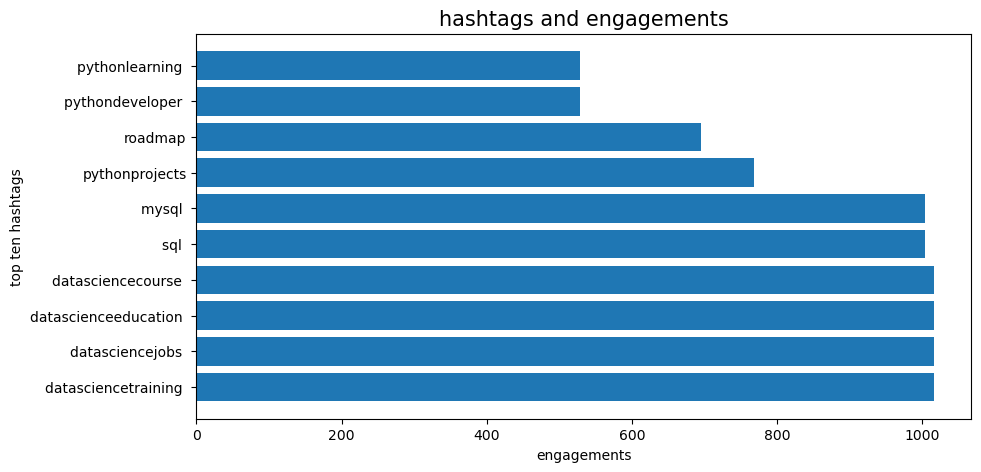

In [84]:
plt.figure(figsize=(10,5))
plt.barh(top_hashtags.index ,top_hashtags.values)
plt.title('hashtags and engagements',fontsize=15)
plt.xlabel('engagements')
plt.ylabel("top ten hashtags")
plt.show()


The bar shows that the data-science-related hashtags like data science course, data science education, data science jobs, and data science training  have the highest engagement levels.

### Are saves more representable than likes,comments and shares

In [28]:
df[['Shares','Likes','Comments','Shares']].corr()

,Shares,Likes,Comments,Shares
Shares,1.000000,0.718790,0.012697,1.000000
Likes,0.718790,1.000000,0.163383,0.718790
Comments,0.012697,0.163383,1.000000,0.012697
Shares,1.000000,0.718790,0.012697,1.000000


<Axes: >

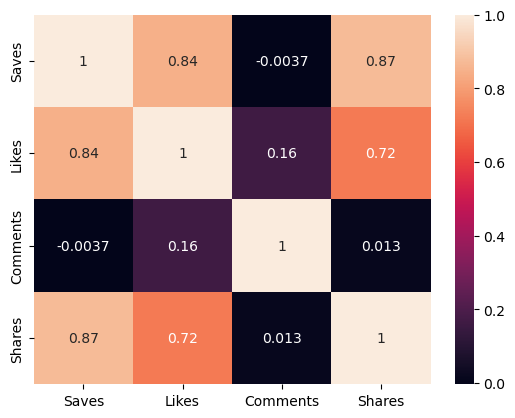

In [31]:
sns.heatmap(df[['Saves','Likes','Comments','Shares']].corr(),annot = True)


The heatmap shows that likes have a very strong relationship with both shares and saves
the relationships involving comments are noticeably weaker.

### conclusions

In [ ]:
- The most common hashtags showed that most people interested in learning about python, pythonprogramming, machinelearning and datascience.                 
- It is clearly appear how effectively profile visits convert into new followers.
- The shorter caption lead to higher engagements and it catch attention.
- As the number of likes increase, the number of comments rise.
- Most of the reach or engagement comes mainly from users who see the post on their home feed, while hashtags and the explore page contribute less in comparison.
- Posts using data-science hashtags attract more interaction from audience and generates higher engagement.
- Likes, shares, and saves tend to move together as signals of strong user interest.